In [2]:
from astropy.io import fits
import numpy as np
import pylab as plt
import matplotlib

%matplotlib inline

In [8]:
hdu = fits.open('simon2011.fits')
tab = hdu[1].data

In [55]:
tab.columns
# Mm - member status
# Bpr - Bayesian probability
# EMpr - EM algorithm probability

ColDefs(
    name = 'SDSS'; format = '19A'; disp = 'A19'
    name = 'Vel'; format = 'E'; unit = 'km/s'; disp = 'F6.1'
    name = 'e_Vel'; format = 'E'; unit = 'km/s'; disp = 'F4.1'
    name = 'EW'; format = 'E'; unit = '0.1nm'; disp = 'F4.1'
    name = 'e_EW'; format = 'E'; unit = '0.1nm'; disp = 'F4.1'
    name = 'Rad'; format = 'E'; unit = 'arcmin'; disp = 'F4.1'
    name = 'MJD'; format = 'D'; unit = 'd'; disp = 'F9.3'
    name = 'gmag'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'rmag'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'imag'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'Mm'; format = 'B'; null = 255; disp = 'I1'
    name = 'EMpr'; format = 'E'; disp = 'F6.3'
    name = 'Bpr'; format = 'E'; disp = 'F6.3'
    name = 'G09'; format = 'I'; null = -32768; disp = 'I3'
    name = 'DR7_8'; format = '5A'; disp = 'A5'
    name = 'Sloan'; format = '5A'; disp = 'A5'
    name = 'SimbadName'; format = '24A'; disp = 'A24'
    name = '_RA'; format = 'D'; unit

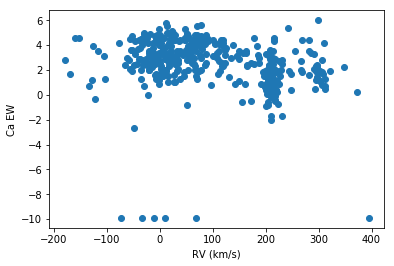

In [69]:
tab = tab[np.isfinite(tab['imag'])]
plt.plot(tab['Vel'],tab['EW'],'o')
plt.xlabel('RV (km/s)')
plt.ylabel('Ca EW')


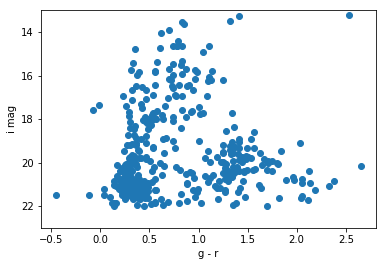

In [70]:

plt.plot(tab['gmag']-tab['rmag'],tab['imag'],'o')
plt.ylim(23,13)
plt.xlabel('g - r')
plt.ylabel('i mag')

In [74]:
# make a data set with the velocity and metallicity
X = np.array([tab['Vel'],tab['EW'],tab['_RA'],tab['_DE'],tab['imag'],tab['gmag']-tab['rmag']])
print(X[:,0:10])
X = X.transpose()
print(X[:,:])

X.shape

[[ -46.79999924  -66.69999695  150.1000061    70.09999847   45.20000076
    29.10000038   54.29999924   -6.69999981  -10.            1.70000005]
 [   3.29999995    2.4000001     2.9000001     4.80000019    1.5
     4.4000001     2.9000001     1.70000005    3.29999995    2.0999999 ]
 [ 151.55825     151.55933333  151.559625    151.56        151.56158333
   151.56195833  151.56316667  151.56470833  151.570625    151.57229167]
 [  15.91002778   16.07352778   16.01413889   16.00361111   15.92019444
    16.14963889   15.93238889   16.01580556   16.09008333   15.93516667]
 [  21.17000008   19.80999947   21.12999916   16.15999985   21.05999947
    19.31999969   19.95999908   20.64999962   20.38999939   20.68000031]
 [   1.6400013     0.3200016     0.48999977    0.69999886    2.32999992
     0.54000092    1.22999954    0.31000137    1.75          1.34000015]]
[[ -46.79999924    3.29999995  151.55825      15.91002778   21.17000008
     1.6400013 ]
 [ -66.69999695    2.4000001   151.55933333   1

(393, 6)

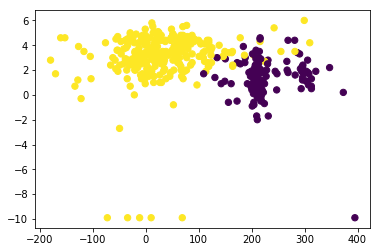

In [75]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')


In [76]:
probs = gmm.predict_proba(X)
print('Type1 Type2 Member? Bayesian Prob   EM Prob')
for i in np.arange(100):
    print('%f %f %i %f %f' % (probs[i,0],probs[i,1],tab['Mm'][i],tab['Bpr'][i],tab['EMpr'][i]))

Type1 Type2 Member? Bayesian Prob   EM Prob
0.000000 1.000000 0 nan nan
0.000001 0.999999 0 0.000000 0.000000
0.925520 0.074480 0 0.000000 0.000000
0.000000 1.000000 0 0.000000 0.000000
0.000000 1.000000 0 nan nan
0.000034 0.999966 0 0.000000 0.000000
0.000000 1.000000 0 nan nan
0.001348 0.998652 0 0.000000 0.000000
0.000000 1.000000 0 nan nan
0.000000 1.000000 0 nan nan
0.000065 0.999935 0 nan nan
0.000000 1.000000 0 nan nan
0.999246 0.000754 0 0.009000 0.000000
0.000071 0.999929 0 nan nan
0.000000 1.000000 0 nan nan
0.000000 1.000000 0 nan nan
0.000000 1.000000 0 nan nan
0.999945 0.000055 0 nan nan
0.000000 1.000000 0 nan nan
0.000000 1.000000 0 nan nan
0.000000 1.000000 0 nan nan
0.996844 0.003156 0 nan nan
0.000000 1.000000 0 nan nan
0.061065 0.938935 0 0.000000 0.000000
0.996917 0.003083 0 0.520000 0.670000
0.999852 0.000148 1 0.503000 0.726000
0.999840 0.000160 1 0.740000 0.929000
0.039388 0.960612 0 0.000000 0.000000
0.000002 0.999998 0 nan nan
0.000000 1.000000 0 nan nan
0.9992